# **Predicting the Health Insurance costs**

**Task:** Consider a multiple regression data (Which has more than one input variable) and implement the same


#**1 Importing Data and libraries**

## 1.1 Importing some basic libraries

In [1]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2 Importing dataset

Lets get the data now. I am trying to get data using the kaggle API

https://www.kaggle.com/general/74235

In [2]:
! pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pravallikamyneni","key":"f400013ae3d536d45782090d7d170263"}'}

In [4]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d mirichoi0218/insurance

  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 20.4MB/s]


Now we have our dataset zip file in the run time. Let's Unzip the dataset

In [7]:
!mkdir dataset
! unzip /content/insurance.zip -d dataset

mkdir: cannot create directory ‘dataset’: File exists
Archive:  /content/insurance.zip
replace dataset/insurance.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: dataset/insurance.csv   


In [8]:
df= pd.read_csv("/content/dataset/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#2. Understanding the data

In [9]:
df.shape

(1338, 7)

In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [12]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Charges')

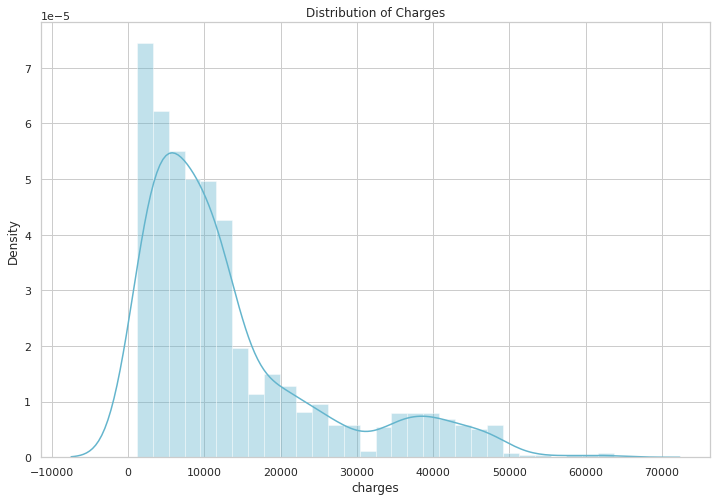

In [13]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


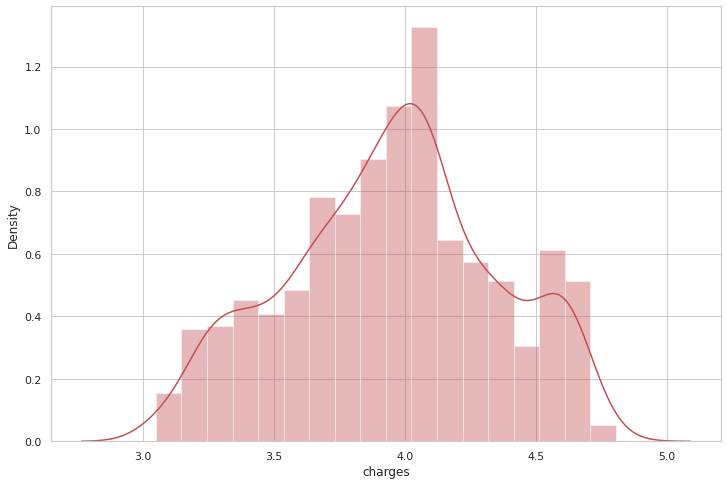

In [14]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

#### Region wise charges

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


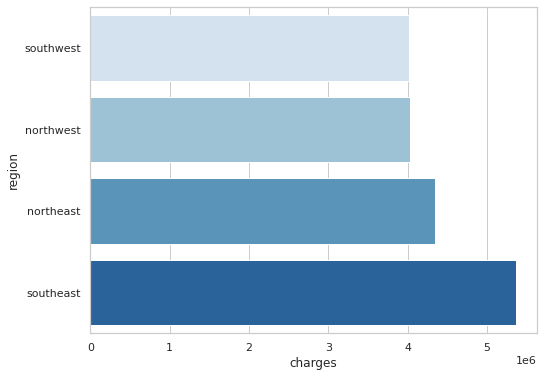

In [15]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head(), charges.head().index, palette='Blues')

#### Visulazing the charges acc to region for males and females

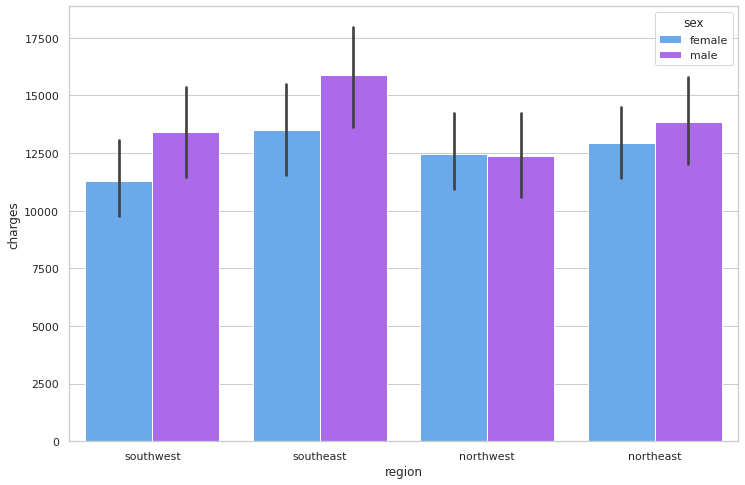

In [16]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

#### Visulazing the charges acc to region for smokers and non-smokers

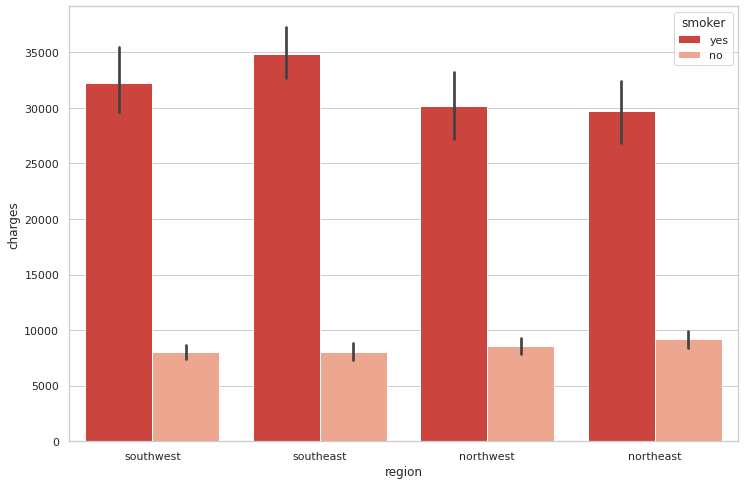

In [17]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='Reds_r')

#### Visulazing the charges acc to region based on number of children

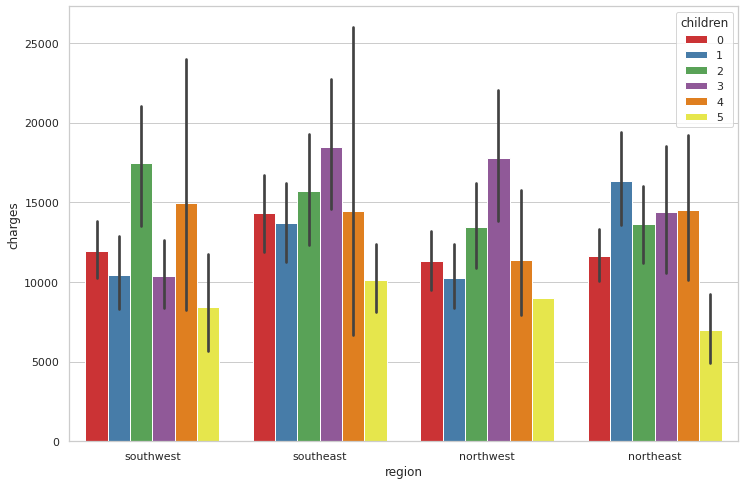

In [18]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')

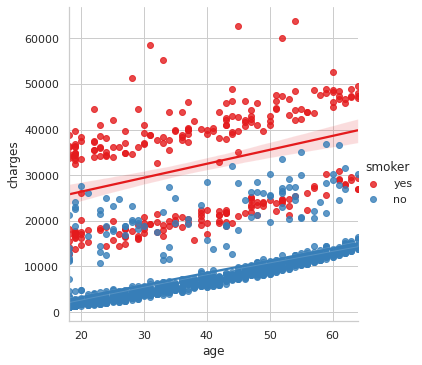

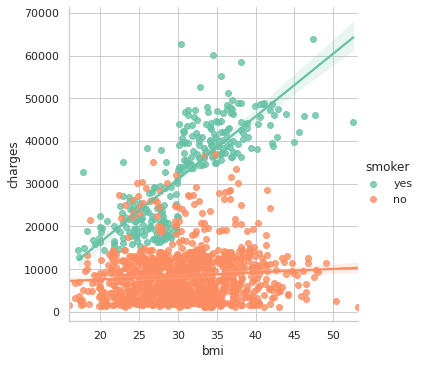

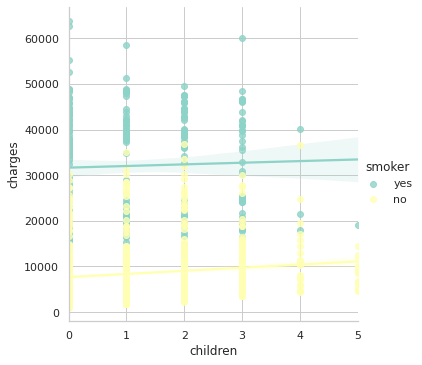

In [19]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

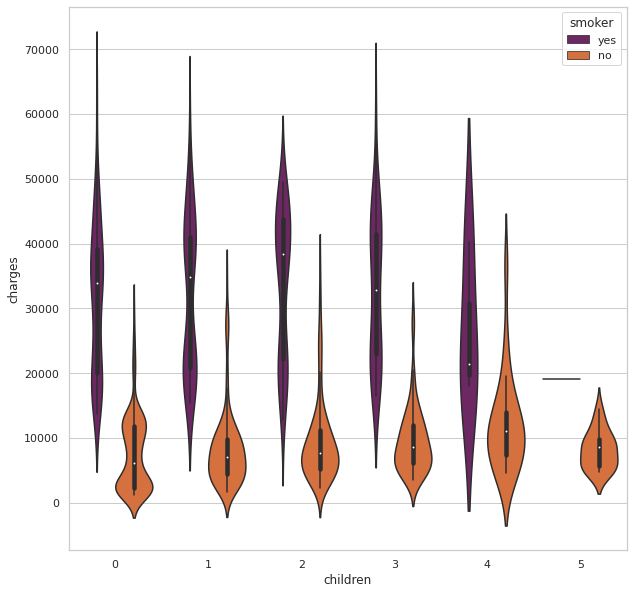

In [20]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'children', y = 'charges', data=df,
                 orient='v', hue='smoker', palette='inferno')

## Preparing the data

In [21]:
##Converting objects labels into categorical
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [22]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

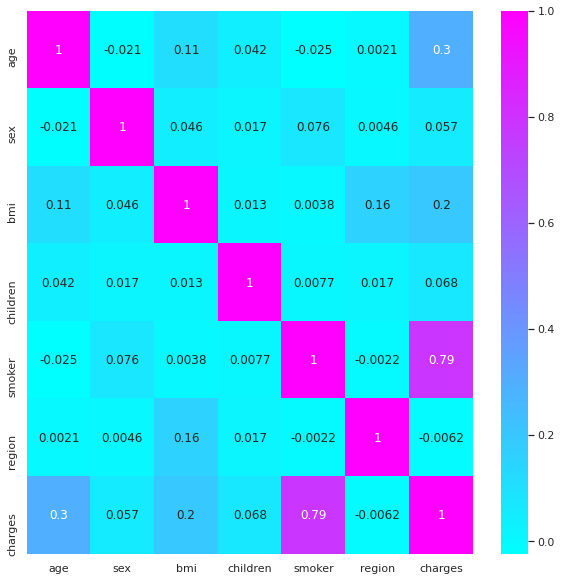

In [23]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')


#3. Model development

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [27]:
x_test.shape

(268, 6)

## Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))
mse = mean_squared_error(y_train, Lin_reg.predict(x_train))
mae = mean_absolute_error(y_train, Lin_reg.predict(x_train))
print("Train mse = ",mse," & mae = ",mae," & rmse = ", sqrt(mse))
#We can calculate the same on the test data to understand how we the model is generalised.
test_mse = mean_squared_error(y_test, Lin_reg.predict(x_test))
test_mae = mean_absolute_error(y_test, Lin_reg.predict(x_test))
print("Test mse = ",test_mse," & mae = ",test_mae," & rmse = ", sqrt(test_mse))

-11661.983908824413
[  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
0.7998747145449959
Train mse =  37729580.50984919  & mae =  4235.3838760320905  & rmse =  6142.440924408568
Test mse =  31845929.134159435  & mae =  3930.3332739011403  & rmse =  5643.219748880902


## Ridge Regression

In [26]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(x_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(x_test, y_test))

mse = mean_squared_error(y_train, Ridge.predict(x_train))
mae = mean_absolute_error(y_train, Ridge.predict(x_train))
print("Train mse = ",mse," & mae = ",mae," & rmse = ", sqrt(mse))
#We can calculate the same on the test data to understand how we the model is generalised.
test_mse = mean_squared_error(y_test, Ridge.predict(x_test))
test_mae = mean_absolute_error(y_test, Ridge.predict(x_test))
print("Test mse = ",test_mse," & mae = ",test_mae," & rmse = ", sqrt(test_mse))

-11643.440927495822
[ 2.53893751e+02 -2.15112284e+01  3.28339566e+02  4.44238477e+02
  2.35009674e+04 -2.89027871e+02]
0.7996989632063141
Train mse =  37730326.17750793  & mae =  4239.814537644872  & rmse =  6142.5016221005535
Test mse =  31873896.43806195  & mae =  3936.645077764159  & rmse =  5645.69716138423


## Lasso Regression

In [29]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(x_train, y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(x_test, y_test))

mse = mean_squared_error(y_train, Lasso.predict(x_train))
mae = mean_absolute_error(y_train, Lasso.predict(x_train))
print("Train mse = ",mse," & mae = ",mae," & rmse = ", sqrt(mse))
#We can calculate the same on the test data to understand how we the model is generalised.
test_mse = mean_squared_error(y_test, Lasso.predict(x_test))
test_mae = mean_absolute_error(y_test, Lasso.predict(x_test))
print("Test mse = ",test_mse," & mae = ",test_mae," & rmse = ", sqrt(test_mse))

-11661.838929039533
[ 2.53991436e+02 -2.34569821e+01  3.28389438e+02  4.43587436e+02
  2.35676136e+04 -2.88340296e+02]
0.7998690236224706
Train mse =  37729581.00157293  & mae =  4235.453069411862  & rmse =  6142.440964435305
Test mse =  31846834.730446476  & mae =  3930.478756589608  & rmse =  5643.299985863456


##Decision Tree regression

In [30]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()
tree_model.fit(x_train, y_train)
tree_mse = mean_squared_error(y_train, tree_model.predict(x_train))
tree_mae = mean_absolute_error(y_train, tree_model.predict(x_train))
tree_test_mse = mean_squared_error(y_test, tree_model.predict(x_test))
tree_test_mae = mean_absolute_error(y_test, tree_model.predict(x_test))
print("Decision Tree training mse = ",tree_mse," & mae = ",tree_mae," & rmse = ", sqrt(tree_mse))
print("Decision Tree test mse = ",tree_test_mse," & mae = ",tree_test_mae," & rmse = ", sqrt(tree_test_mse))

Decision Tree training mse =  244239.55438233944  & mae =  29.572515327102803  & rmse =  494.20598375812835
Decision Tree test mse =  55048421.04547206  & mae =  3688.892328727612  & rmse =  7419.462315119073


## random forest regression

In [31]:
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn import metrics

x = df.drop(['charges'], axis=1)
y = df.charges
Rfr = rfr(n_estimators = 100, criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
Rfr.fit(x_train,y_train)
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % 
      (mean_squared_error(x_train_pred, y_train),
       mean_squared_error(x_test_pred, y_test)))
print('R2 train data: %.3f, R2 test data: %.3f' % 
      (metrics.r2_score(y_train,x_train_pred, y_train),
       metrics.r2_score(y_test,x_test_pred, y_test)))

tree_mse = mean_squared_error(y_train, Rfr.predict(x_train))
tree_mae = mean_absolute_error(y_train, Rfr.predict(x_train))
tree_test_mse = mean_squared_error(y_test, Rfr.predict(x_test))
tree_test_mae = mean_absolute_error(y_test, Rfr.predict(x_test))

print("training mse = ",tree_mse," & mae = ",tree_mae," & rmse = ", sqrt(tree_mse))
print("test mse = ",tree_test_mse," & mae = ",tree_test_mae," & rmse = ", sqrt(tree_test_mse))

MSE train data: 3630549.354, MSE test data: 19737210.132
R2 train data: 0.971, R2 test data: 0.877
training mse =  3630549.354103289  & mae =  1047.8310023860097  & rmse =  1905.4000509350494
test mse =  19737210.13159848  & mae =  2644.4281321816666  & rmse =  4442.658002997584


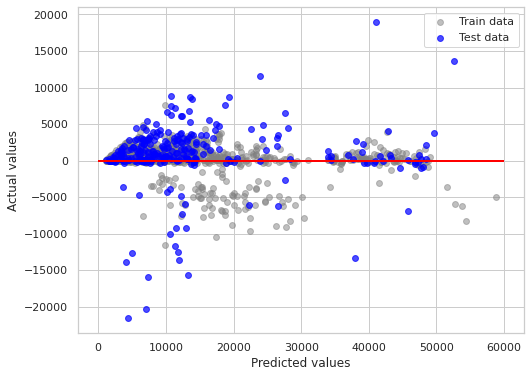

In [32]:
plt.figure(figsize=(8,6))

plt.scatter(x_train_pred, x_train_pred - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(x_test_pred, x_test_pred - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')


###Evaluating the feature Impotance

Feature importance ranking


1.smoker(0.601678)
2.bmi(0.218751)
3.age(0.136942)
4.children(0.021042)
5.region(0.015209)
6.sex(0.006377)


<BarContainer object of 6 artists>

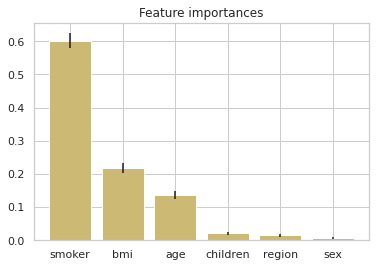

In [33]:
print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="y", yerr=std[indices], align="center")

Polynomial regression

In [34]:
from sklearn.preprocessing import PolynomialFeatures
x = df.drop(['charges', 'sex', 'region'], axis = 1)
y = df.charges
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(x)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)
print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print("ACcuracy", Pol_reg.score(x_test, y_test))
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
print("RMSE TRAIN: ",rmse_train)

-11661.983908824413
[  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
ACcuracy 0.7998747145449959
RMSE TRAIN:  6142.440924408568


In [35]:
##Evaluating the performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 3930.3332739011403
Mean Squared Error: 31845929.134159435
Root Mean Squared Error: 5643.219748880902


# 4. Test data

**The model with least rmse for train and test is Random Forest regressor**
The Decision tree for train may seem the best. But if you observe the test rmse.. its the highest ... *A classic case of overfitting*

In [37]:
##Predicting the charges
y_test_pred = Rfr.predict(x_test)
##Comparing the actual output values with the predicted values
ans = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
ans

,Actual,Predicted
578,9724.53000,12298.752297
610,8547.69130,10363.546342
569,45702.02235,44685.536670
1034,12950.07120,13243.270893
198,9644.25250,10404.967950
...,...,...
1084,15019.76005,16534.917577
726,6664.68595,6588.636467
1132,20709.02034,11567.578511
725,40932.42950,40888.070311


#5. User Input

In [38]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [39]:
user_input_age = input("Enter age: ")
user_input_gender = input("Enter gender: ").lower()
user_input_bmi = input("Enter BMI: ")
user_input_children = input("Enter No of children: ")
user_input_smoker = input("Enter No of smoker: ").lower()
user_input_region = input("Enter region of the hospital location: ").lower()

Enter age: 50
Enter gender: female
Enter BMI: 30
Enter No of children: 5
Enter No of smoker: no
Enter region of the hospital location: southwest


In [40]:
user_input = {'age' : [user_input_age], 'sex' : [user_input_gender] , 'bmi' : [user_input_bmi] , 'children' : [user_input_children] ,'smoker': [user_input_smoker],'region': [user_input_region] }


In [41]:
user_input_df = pd.DataFrame(user_input)
user_input_df

,age,sex,bmi,children,smoker,region
0,50,female,30,5,no,southwest


In [48]:
user_input_df[['sex', 'smoker', 'region']] = user_input_df[['sex', 'smoker', 'region']].astype('category')
user_input_df

,age,sex,bmi,children,smoker,region
0,50,female,30,5,no,southwest


In [50]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(user_input_df.sex.drop_duplicates())
user_input_df.sex = label.transform(user_input_df.sex)
label.fit(user_input_df.smoker.drop_duplicates())
user_input_df.smoker = label.transform(user_input_df.smoker)
label.fit(user_input_df.region.drop_duplicates())
user_input_df.region = label.transform(user_input_df.region)

In [51]:
answer_1 = Rfr.predict(user_input_df)
answer_1


array([14037.2813119])